<a href="https://colab.research.google.com/github/Shaghayegh-Aflatounian/Churn-prediction-machine-learning/blob/main/churnprediction_random_forest_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this code we have leveraged different machine learning alorithms to perform churn prediction analysis, and comparing their performances through loss, accuracy, confusion matrix. The selected models were Logistic regression, random forest and catboost algorithms.

throught this task it has been shown that catboost has the most fast performance and highest accuracy.

In [ ]:
#Importing necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import sklearn


from sklearn.preprocessing import LabelEncoder
from pandas import Series, DataFrame

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors

dataset = pd.read_csv('Churn_Modelling.csv')

In [ ]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
dataset.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
9995,False
9996,False
9997,False
9998,False


In [ ]:
print(dataset.isnull().sum())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


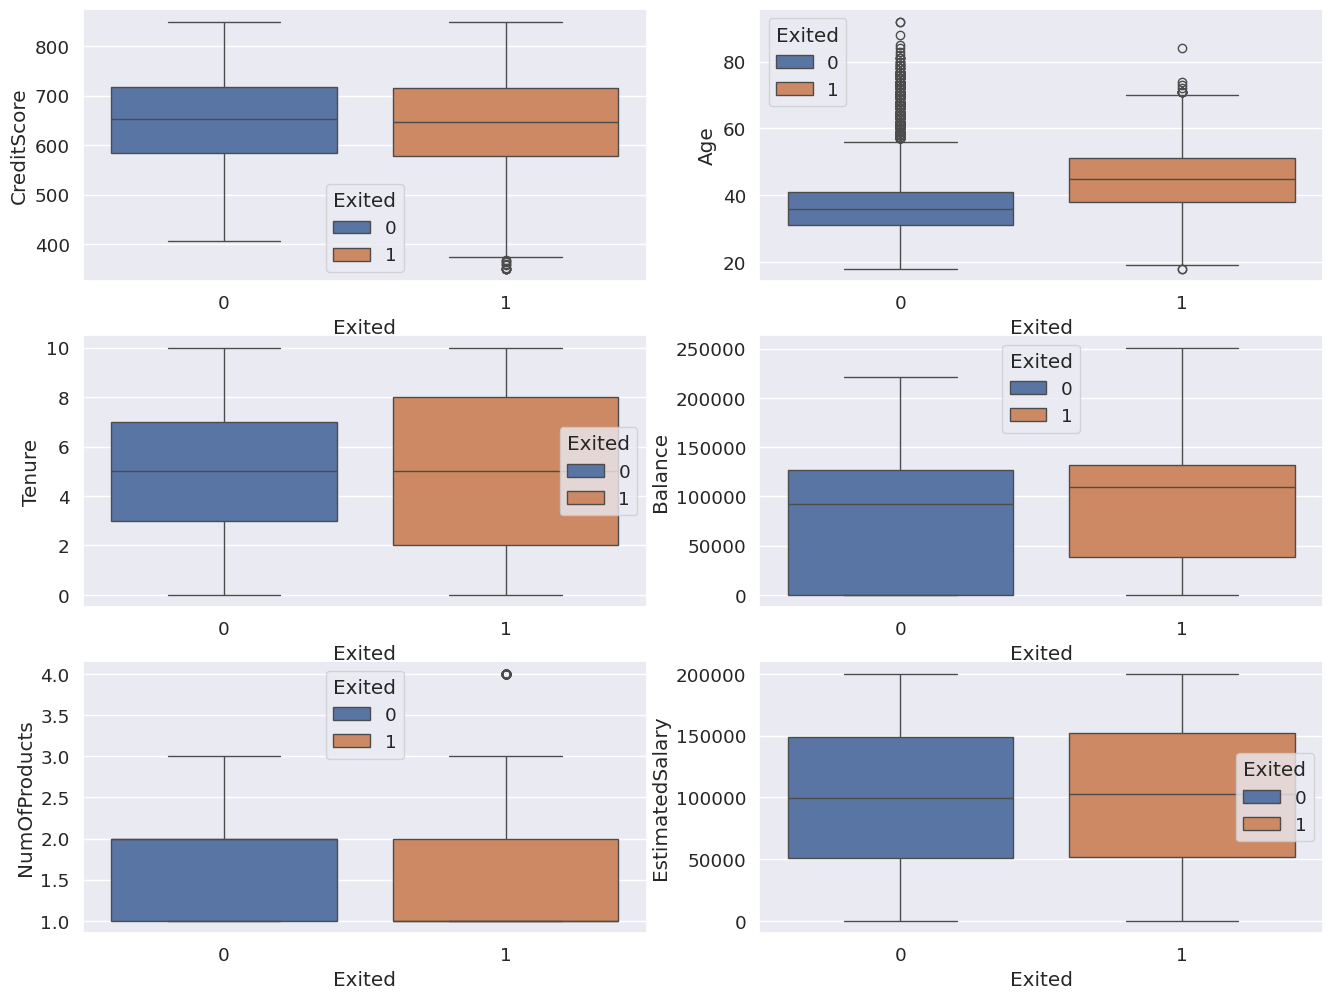

In [ ]:
# Relations of target variable with the numerical data

fig, axarr = plt.subplots(3, 2, figsize=(16, 12))
sns.boxplot(y='CreditScore', x='Exited', hue='Exited', data=dataset, ax=axarr[0][0])
sns.boxplot(y='Age', x='Exited', hue='Exited', data=dataset, ax=axarr[0][1])
sns.boxplot(y='Tenure', x='Exited', hue='Exited', data=dataset, ax=axarr[1][0])
sns.boxplot(y='Balance', x='Exited', hue='Exited', data=dataset, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts', x='Exited', hue='Exited', data=dataset, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary', x='Exited', hue='Exited', data=dataset, ax=axarr[2][1])

plt.subplots_adjust(hspace=0.2)

In [ ]:
dataset = dataset.drop(columns=['RowNumber', 'CustomerId', 'Surname'], axis=1)
dataset = pd.get_dummies(data=dataset, drop_first=True)

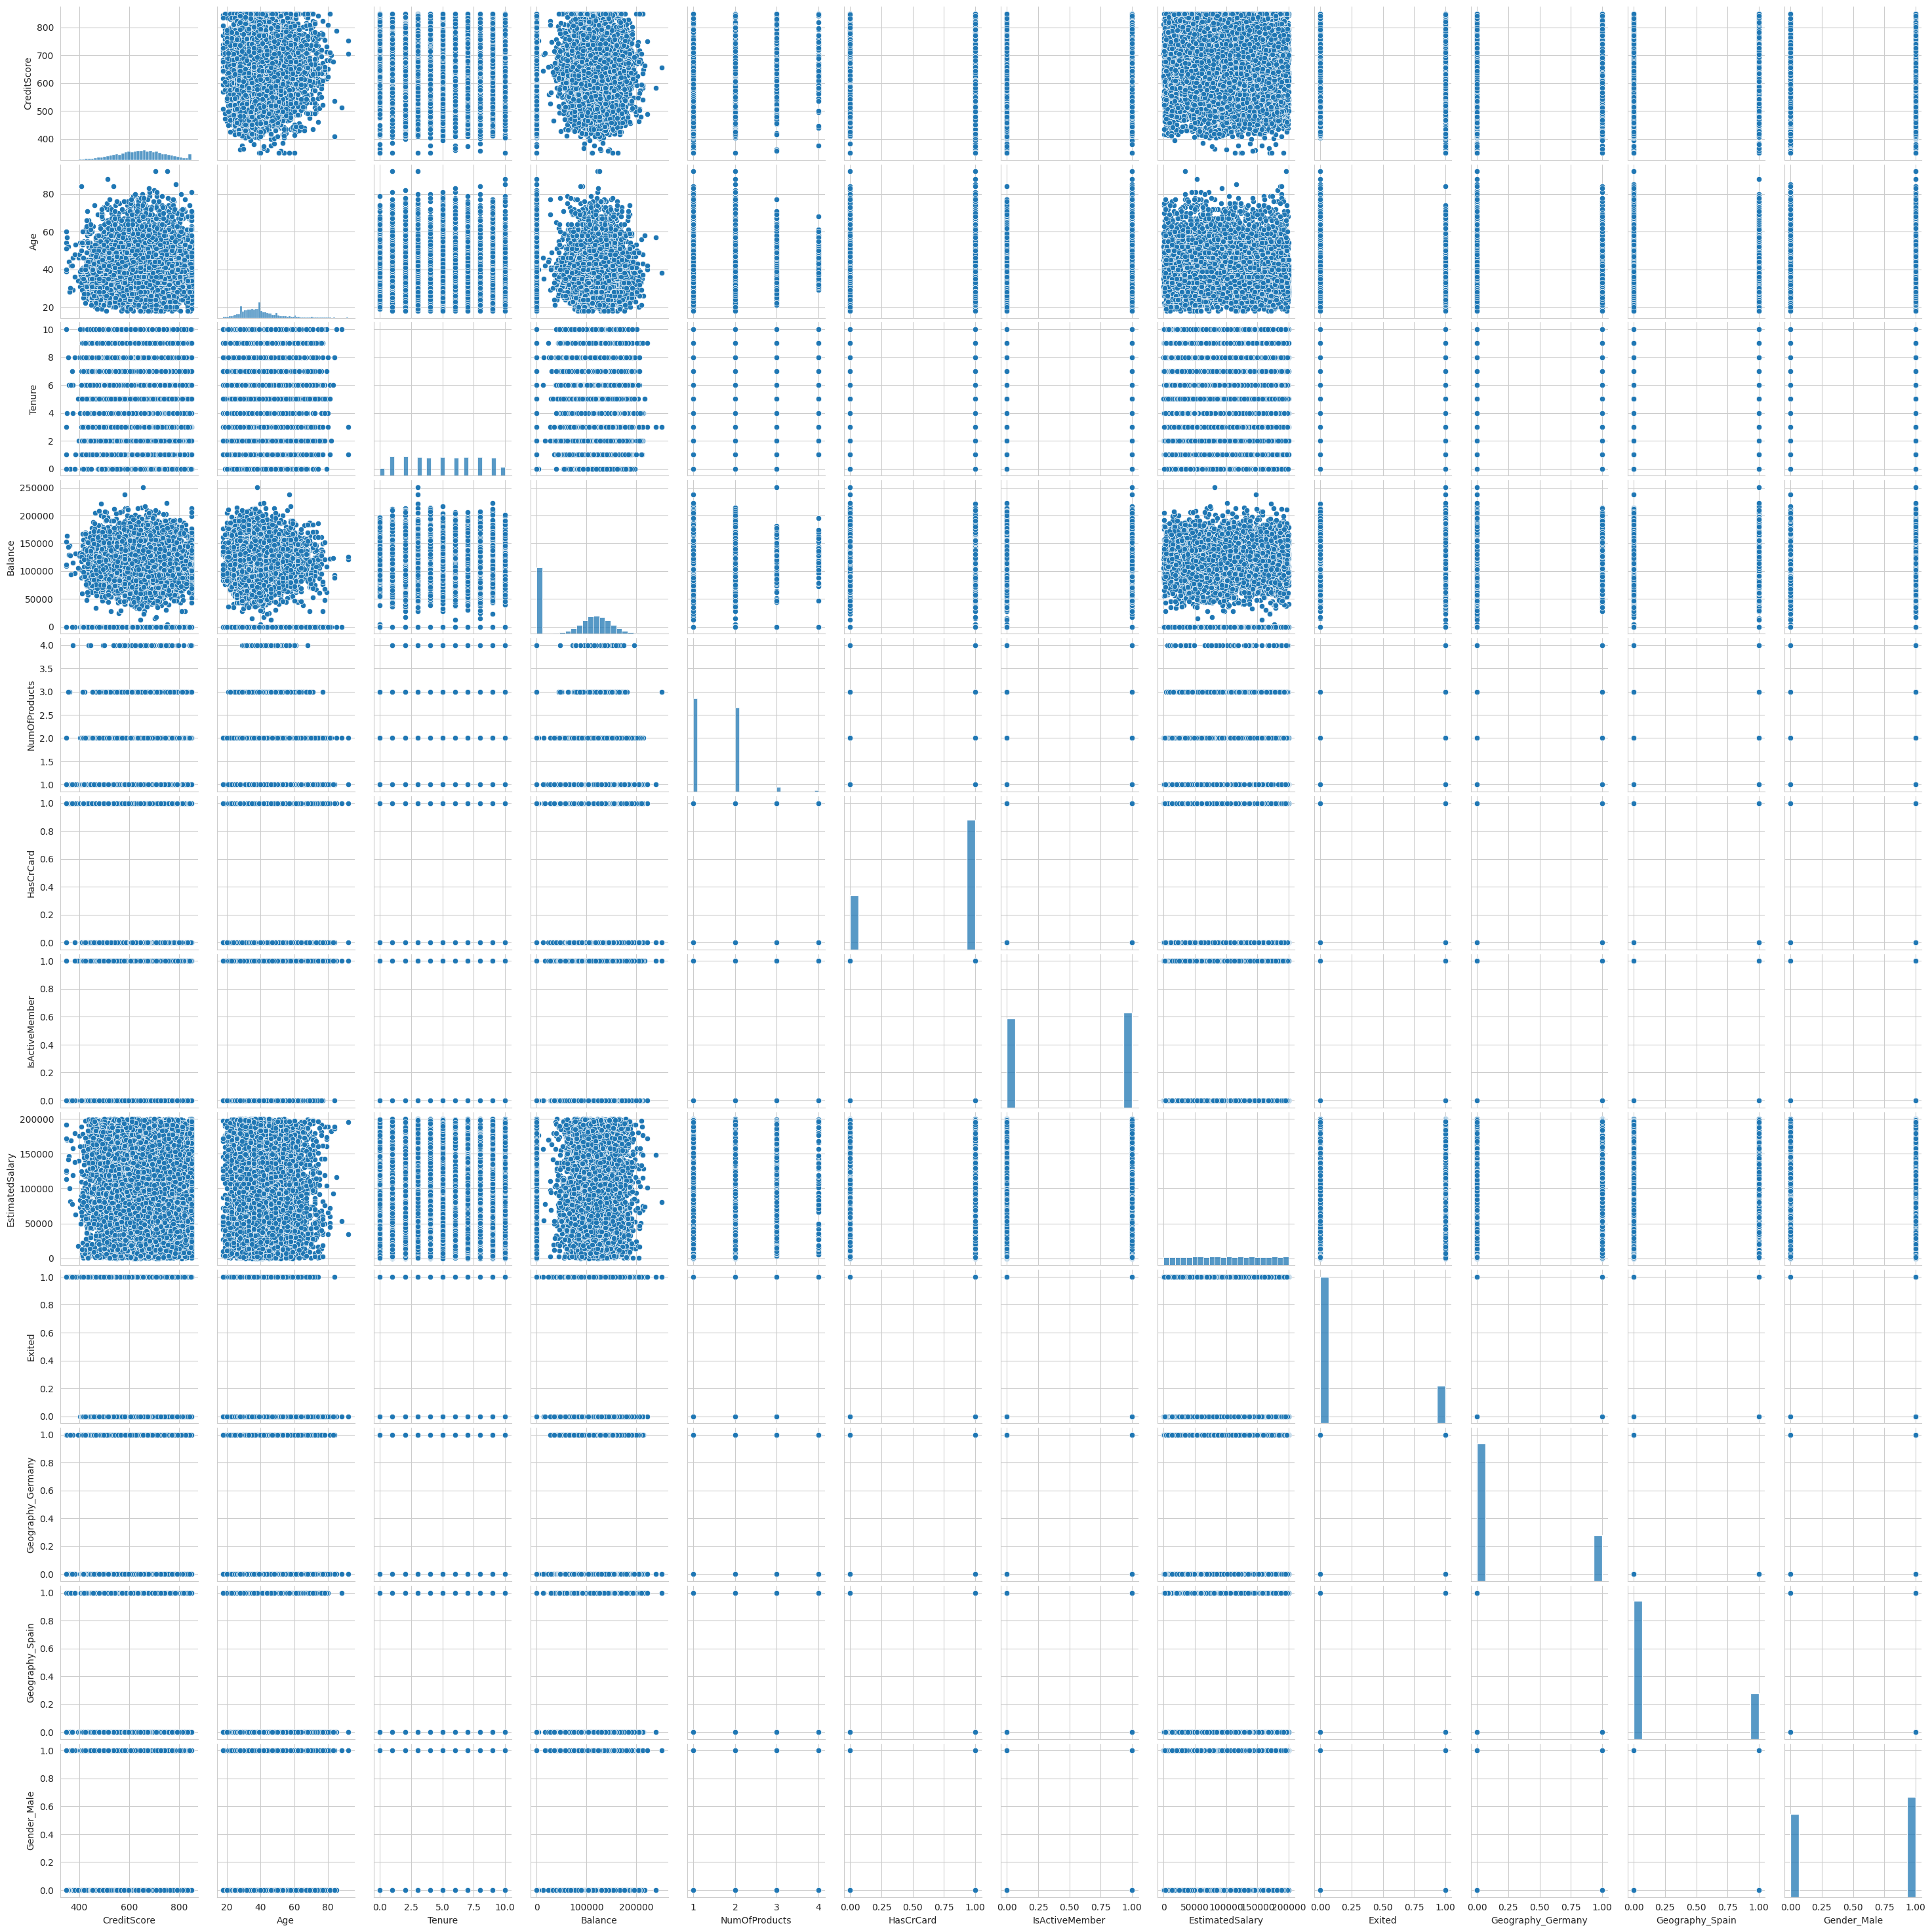

In [ ]:
import seaborn as sb
sb.set_style('whitegrid')
from collections import Counter
sb.pairplot(dataset)

In [ ]:
print(dataset.corr())

                   CreditScore       Age    Tenure   Balance  NumOfProducts  \
CreditScore           1.000000 -0.003965  0.000842  0.006268       0.012238   
Age                  -0.003965  1.000000 -0.009997  0.028308      -0.030680   
Tenure                0.000842 -0.009997  1.000000 -0.012254       0.013444   
Balance               0.006268  0.028308 -0.012254  1.000000      -0.304180   
NumOfProducts         0.012238 -0.030680  0.013444 -0.304180       1.000000   
HasCrCard            -0.005458 -0.011721  0.022583 -0.014858       0.003183   
IsActiveMember        0.025651  0.085472 -0.028362 -0.010084       0.009612   
EstimatedSalary      -0.001384 -0.007201  0.007784  0.012797       0.014204   
Exited               -0.027094  0.285323 -0.014001  0.118533      -0.047820   
Geography_Germany     0.005538  0.046897 -0.000567  0.401110      -0.010419   
Geography_Spain       0.004780 -0.001685  0.003868 -0.134892       0.009039   
Gender_Male          -0.002857 -0.027544  0.014733  

# **Logistic Regression**
Logistic Regression:
Logistic Regression is a fundamental classification algorithm used to predict the probability of a binary outcome. It estimates the relationship between the dependent variable and one or more independent variables by fitting a logistic function. It's a linear model that works well for binary classification tasks, providing interpretable results. it classify sth based on the probability it recieve oer 50% and under it.

In [ ]:
from sklearn.model_selection import cross_val_predict

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
%matplotlib inline
dataset = pd.get_dummies(data=dataset, drop_first=True)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

x = dataset.drop(['Exited'], axis=1)
y = dataset['Exited']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)  # Standardize the testing data

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



In [ ]:
y_train_pred = cross_val_predict(LogisticRegression(), x_train, y_train, cv=5)
confusion_matrix(y_train, y_train_pred)

array([[6125,  231],
       [1286,  358]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



In [ ]:

from sklearn.metrics import accuracy_score, confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1543   64]
 [ 314   79]]


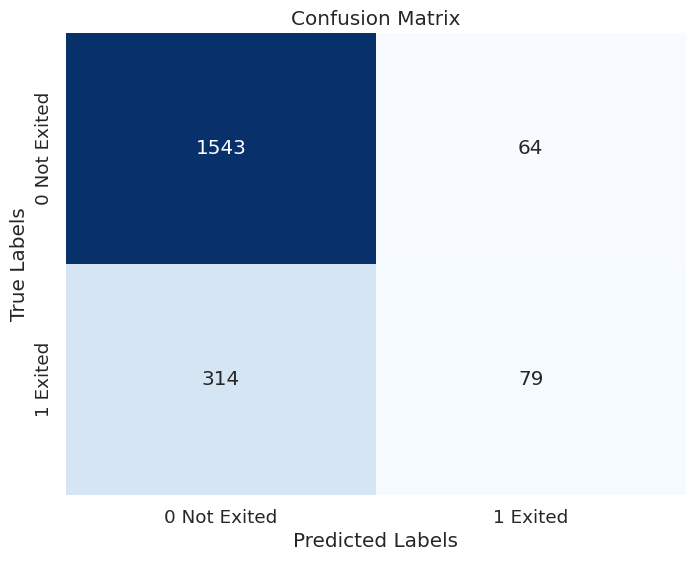

In [ ]:
# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font scale for better readability
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['0 Not Exited', '1 Exited'],
            yticklabels=['0 Not Exited', '1 Exited'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# **CatBoost Algorithm**
why catboost: We often encounter datasets that contain categorical features and to fit these datasets into the Boosting model we apply various encoding techniques to the dataset such as One-Hot Encoding or Label Encoding. But **applying One-Hot encoding creates a sparse matrix which may sometimes lead to the overfitting of the model to handle this issue we use CatBoost. CatBoost automatically handles categorical features.**


**[Features of CatBoost ](https:// [link text](https://))**
Built-in Method for handling categorical features: CatBoost efficiently handles categorical features without requiring preprocessing. This capability eliminates the need to convert non-numeric factors into numerical values, simplifying the data preparation process.
Excellent result without parameter tuning: CatBoost aims to provide excellent results without the need for extensive parameter tuning. This feature saves time and effort for users, as they can achieve competitive performance with default parameters.
Built-in methods for Handling missing values: Unlike other Models, CatBoost can handle missing values in the input data without requiring imputation.
Automatic feature scaling: CatBoost internal scales all the columns to the same scaling whereas in other models we need to convert columns extensively.
Robust to Overfitting: CatBoost implements a variety of techniques to prevent overfitting, such as robust tree boosting, ordered boosting, and the use of random permutations for feature combinations. These techniques help in building models that generalize well to unseen data.
Built-in cross-validation – CatBoost internally applies a cross-validation method to choose the best hyperparameters for the model.
Fast and scalable GPU version: CatBoost offers a GPU-accelerated version of its algorithm, allowing users to train models quickly on large datasets. The GPU implementation enhances scalability and performance, especially when dealing with multi-card configurations.

In [ ]:
!pip install catboost
from catboost import CatBoostClassifier

from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder


# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6)
model.fit(X_train, y_train) # fit the model to training data


y_pred = model.predict(X_test) # Predict on the testing data

accuracy = accuracy_score(y_test, y_pred) #model performance
classification_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 5.0 MB/s eta 0:00:00
0:	learn: 0.6437623	total: 49.1ms	remaining: 4.86s
1:	learn: 0.6043569	total: 52.2ms	remaining: 2.56s
2:	learn: 0.5711301	total: 54.3ms	remaining: 1.76s
3:	learn: 0.5417856	total: 56.5ms	remaining: 1.35s
4:	learn: 0.5174941	total: 58.9ms	remaining: 1.12s
5:	learn: 0.4960379	total: 61.1ms	remaining: 958ms
6:	learn: 0.4773578	total: 63.5ms	remaining: 843ms
7:	learn: 0.4612299	total: 65.8ms	remaining: 757ms
8:	learn: 0.4457814	total: 68.2ms	remaining: 689ms
9:	learn: 0.4324099	total: 70.5ms	remaining: 634ms
10:	learn: 0.4216310	total: 72.8ms	remaining: 589ms
11:	learn: 0.4121593	total: 75.1ms	remaining: 550ms
12:	learn: 0.4044421	total: 77.2ms	remaining: 517ms
13:	learn: 0.3975510	total: 79.5ms	remaining: 488ms
14:	learn: 0.3900505	total: 81.8ms	remaining: 464ms
15:	learn: 0.3841473	total: 88.1ms	remaining: 462ms
16:	learn: 0.3783421	total: 91.8ms	remaining: 448ms
17:	learn: 0.3747248	total: 95.6ms	remaining: 43

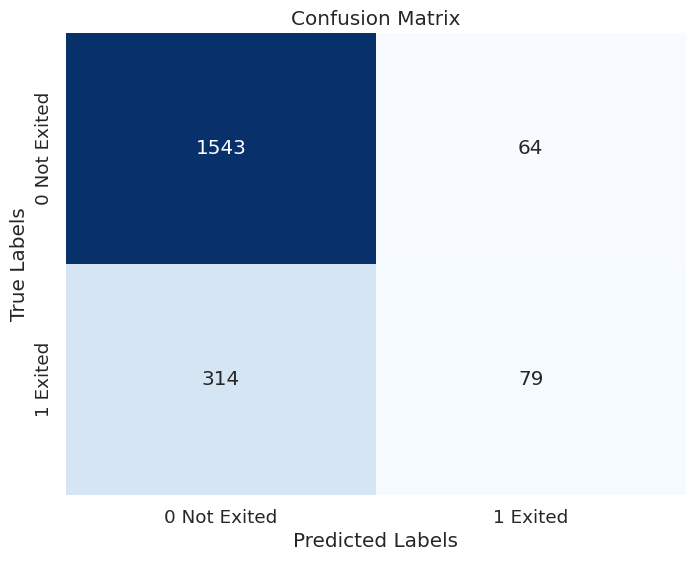

In [ ]:
# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font scale for better readability
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['0 Not Exited', '1 Exited'],
            yticklabels=['0 Not Exited', '1 Exited'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# **Random forest algorithms**




1. **Bootstrap Aggregating (Bagging) Dataset Selection:**
   - Random Forest begins by randomly selecting bootstrap samples from the original dataset. These samples are used to train multiple decision trees. The selection process can be repeated, allowing for instances to appear in different samples.

2. **Construction of Decision Trees with Random Feature Subsets:**
   - For each decision tree in the Random Forest, a subset of features is randomly selected at each split point. This randomness helps in decorrelating the trees and introducing diversity. The algorithm has its way of determining the optimal variables and their number at each step. Criteria like Gini Index or Entropy can be used to find the best split for each node.

3. **Iteration and Ensemble Building:**
   - The process iterates by repeating steps 1 and 2 to grow a forest of diverse decision trees. Each tree in the ensemble is built independently, contributing its unique perspective to the final prediction. This diversity is what makes Random Forest more effective than individual decision trees.

4. **Voting Mechanism for Final Decision:**
   - After training the ensemble of decision trees, when making predictions, each tree "votes" on the class or outcome. The final prediction is determined by aggregating these votes, typically by selecting the class that receives the majority of votes. This voting mechanism helps in creating a robust and accurate prediction model.



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Random Forest with hyperparameter tuning
rf = RandomForestClassifier()

# Define the grid of hyperparameters to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search with cross-validation
rf_grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
rf_grid.fit(x_train, y_train)

# Get the best parameters
best_params = rf_grid.best_params_

# Instantiate the Random Forest model with the best hyperparameters
best_rf = RandomForestClassifier(**best_params)
best_rf.fit(x_train, y_train)

# Predict using the tuned model
y_pred_rf = best_rf.predict(x_test)
print(classification_report(y_test, y_pred_rf))